# Stuff to do for a mouse in 2D:

In [25]:
import numpy as np
import matplotlib.pyplot as plt

n_cells = 4

In [26]:
def simulate_mouse_in_2D(L=1, N=2000, sigma=0.1):
    """This is supposed to simulate a random walk in 2D space
    
    N is the number of time steps the trajectory has, and L is the size of the room or space the mouse is running in"""

    trajectory = np.zeros((N, 2))  # Initialize trajectory array
    x_0, y_0 = L/2, L/2

    for t in range(N):
        dx = 0+sigma*np.random.randn()
        dy = 0+sigma*np.random.randn()
        x_0 += dx
        y_0 += dy
        # Keep the mouse within the bounds of the room
        x_0 = np.clip(x_0, 0, L)
        y_0 = np.clip(y_0, 0, L)
        trajectory[t] = [x_0, y_0]

    return trajectory

In [27]:
def return_cell_corresponding_to_position(position, L=1, N=n_cells):
    """Return the cell corresponding to the position in a grid of size L with n_cells per side."""
    cell_size = L / N
    x_cell = int(position[0] // cell_size)
    y_cell = int(position[1] // cell_size)
    return x_cell, y_cell

def coarse_grain_the_trajectory(trajectory_as_list, L=1, n_cells=4):
    """Coarse grain the trajectory into a grid of size L with n_cells per side."""
    lattice_trajectory_states = []
    for position in trajectory_as_list:
        cell = return_cell_corresponding_to_position(position, L, n_cells)
        lattice_trajectory_states.append(cell)
    
    return np.array(lattice_trajectory_states)

In [28]:
nparray_to_list = simulate_mouse_in_2D().tolist()
lattice_trajectories = coarse_grain_the_trajectory(nparray_to_list)

print(lattice_trajectories[:10])

[[3 1]
 [3 1]
 [3 1]
 [4 1]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 1]]


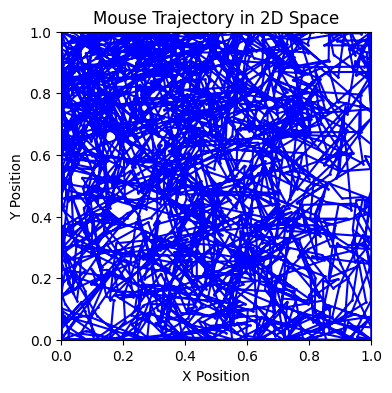

In [29]:
%matplotlib inline

# plot the x, y coordinates of the trajectory stored in nparray_to_list

plt.figure(figsize=(4, 4))
plt.plot(*zip(*nparray_to_list), marker='o', markersize=1, linestyle='-', color='blue', label='Mouse Trajectory')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Mouse Trajectory in 2D Space')
plt.show()

In [ ]:
def train_hebbian(cell_trajectories, n_cells=4, kernel_size=3, eta=0.1, gamma=1, mu=0.1):
    """
    Trains 4 neurons using Hebbian learning based on localized receptive fields (kernels) placed in the four corners
    of a coarse-grained 2D space. The neurons learn to specialize in one of the four quadrants.
    
    Arguments:
    - cell_trajectories: list of (x, y) cell indices visited by the mouse
    - n_cells: number of cells along each axis of the grid (grid is n_cells x n_cells)
    - kernel_size: size of each neuron's receptive field (k x k)
    - eta: learning rate
    - gamma: decay scaling
    - mu: mutual inhibition strength
    """

    

In [31]:
# Parameters
N = 1000
eta = 0.1
gamma = 0.1


W_final = train_hebbian(lattice_trajectories, eta=eta, gamma=gamma, n_cells=n_cells)

IndexError: index 17 is out of bounds for axis 0 with size 16

In [ ]:
%matplotlib inline

plt.imshow(W_final, cmap='coolwarm')
plt.colorbar(label='Synaptic weight')
plt.xticks(ticks=np.arange(4), labels=[f'State {i}' for i in range(4)])
plt.yticks(ticks=np.arange(4), labels=[f'Neuron {i}' for i in range(4)])
plt.xlabel('Input state')
plt.ylabel('Neuron')
plt.title('Learned Synaptic Weights')
plt.show()